In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots
import astroML.stats

In [2]:
sunny = 1
cloudy = 0

N = 10000

current = cloudy

In [3]:
def sample(current, N):
    weather = [current] 
    
    for i in range(1, N):
        p_acc = np.random.uniform(0, 1)

        if current == 1:  # Assuming 1 represents sunny
            if p_acc < 0.9: 
                weather.append(1)
            else:
                weather.append(0)  # Assuming 0 represents cloudy
        else:
            if p_acc < 0.5: 
                weather.append(1)
            else:
                weather.append(0)

        current = weather[i]

    return np.array(weather)

In [4]:
sample(current,N)
probability = np.sum(sample(current, N)) / N
print(probability)

0.8362


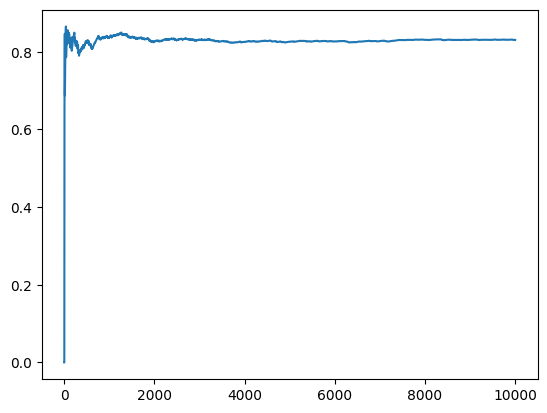

In [5]:
trace = np.cumsum(sample(current, N))/(np.arange(sample(current, N).size)+1 )
plt.plot(trace)
plt.show()

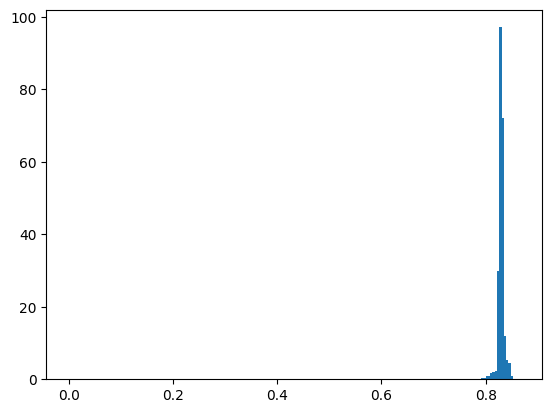

In [6]:
plt.hist(trace, bins = 200, density=True)
plt.show()

In [7]:
print(np.median(trace))
print(astroML.stats.sigmaG(trace))

0.8291854842960648
0.0032348865388016654


Burn-in

0.8280336167758487
0.002938727016175577


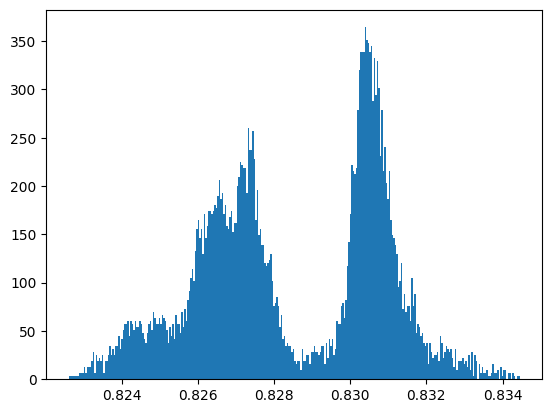

In [8]:
burnin_index=2000
trace_burn = trace[burnin_index:]

plt.hist(trace_burn, bins=300, density=True);
print(np.median(trace_burn))
print(astroML.stats.sigmaG(trace_burn))